In [1]:
import os
import torch
import matplotlib.pyplot as plt
import pandas as pd
from datasets import Dataset
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

In [2]:
# Path to the clients_dataset folder
client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_dataset"
# No. of Clients
num_clients = len([f for f in os.listdir(client_dataset_path) if os.path.isdir(os.path.join(client_dataset_path, f))])
num_clients

10

In [3]:
# List to store the client datasets
client_train_datasets = {}
client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for client_id in range(num_clients):
    client_folder = f"client_{client_id}"
    
    train_file = os.path.join(client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(train_file)
    
    # Create a Dataset for the client
    client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

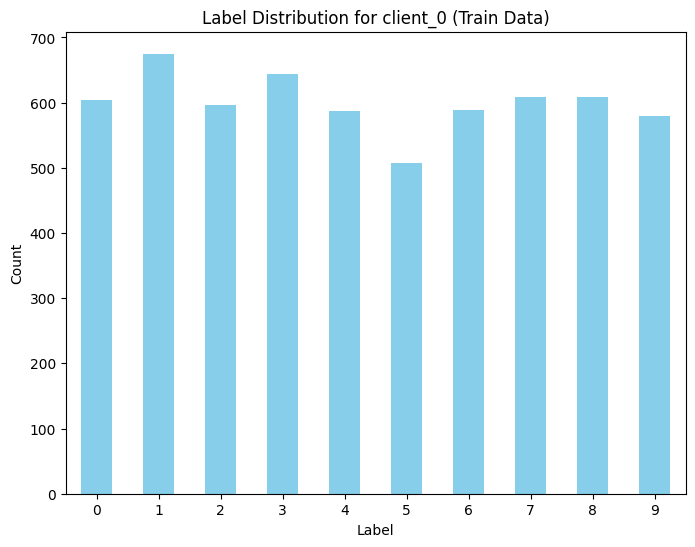

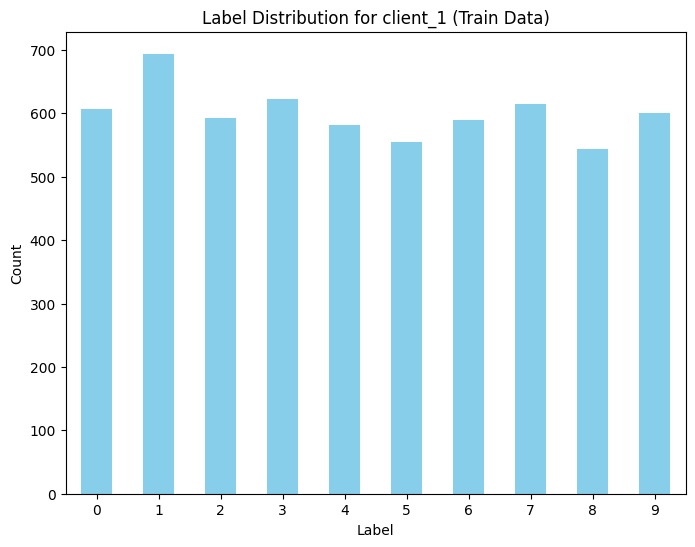

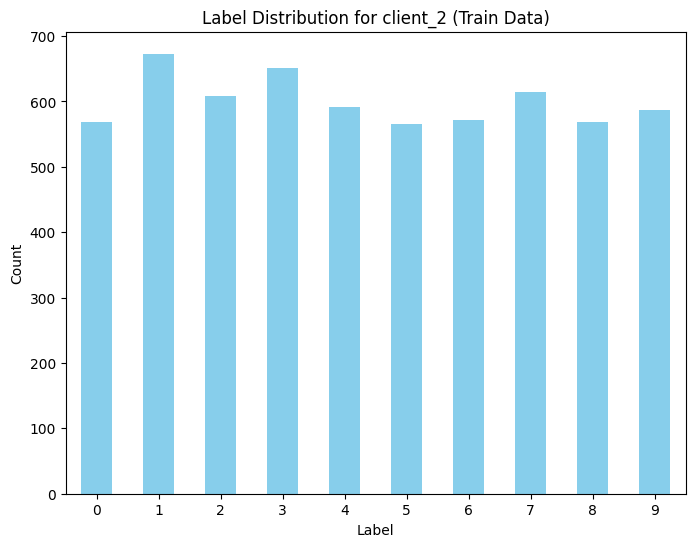

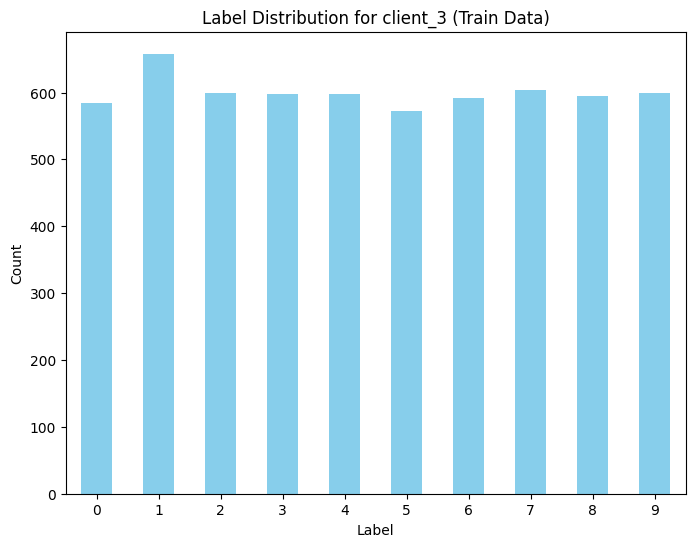

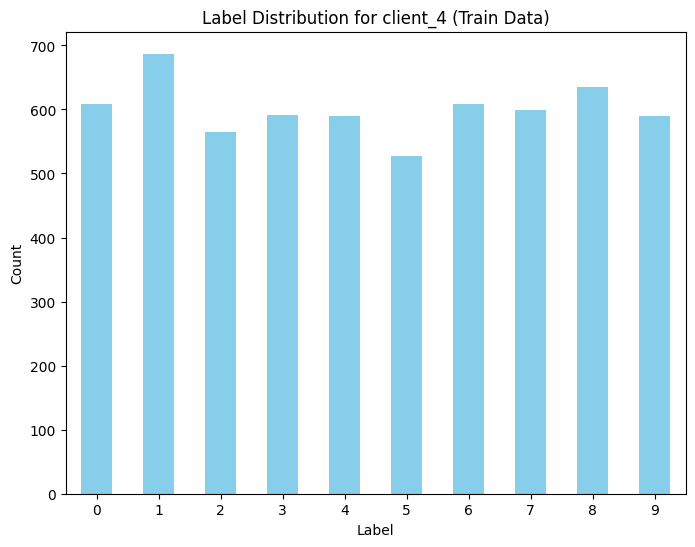

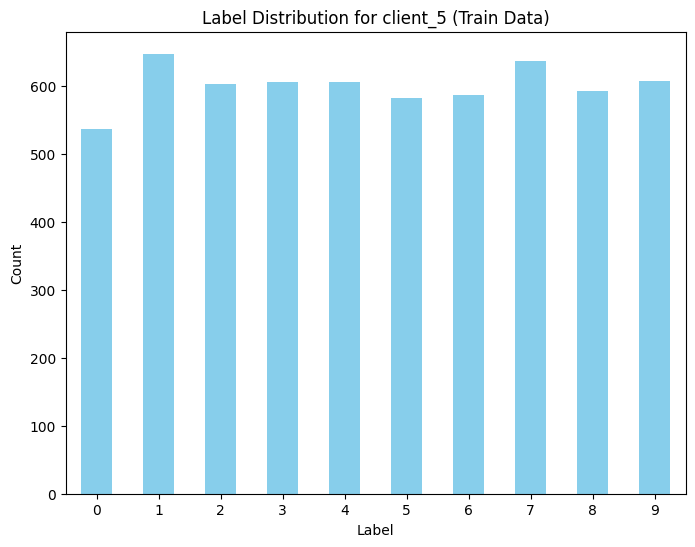

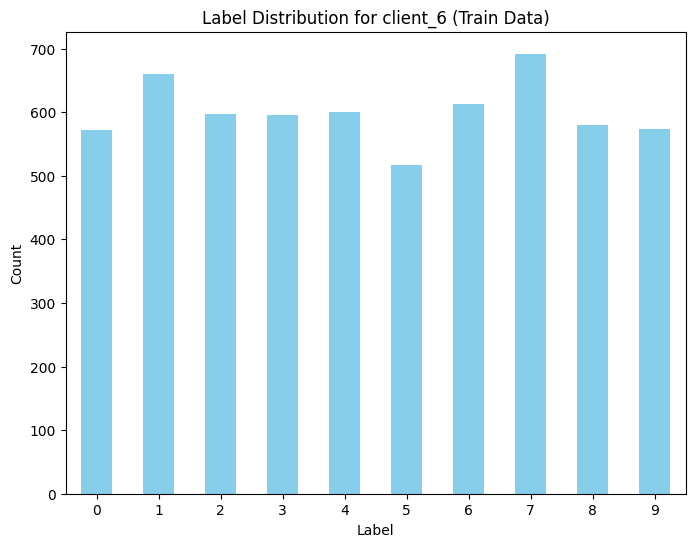

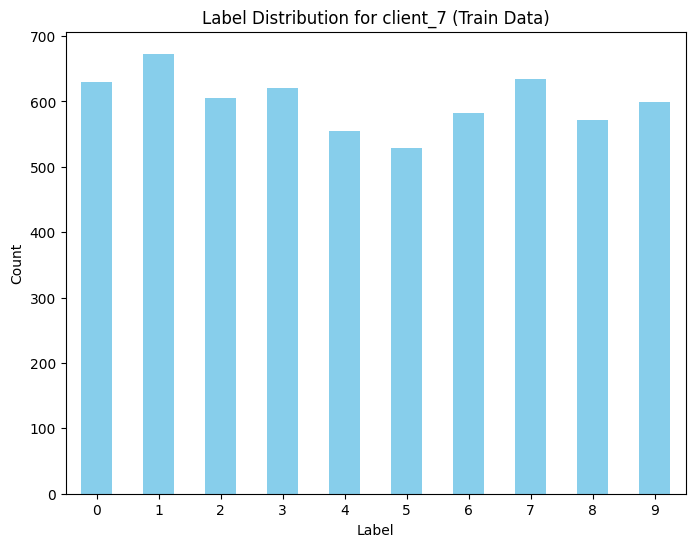

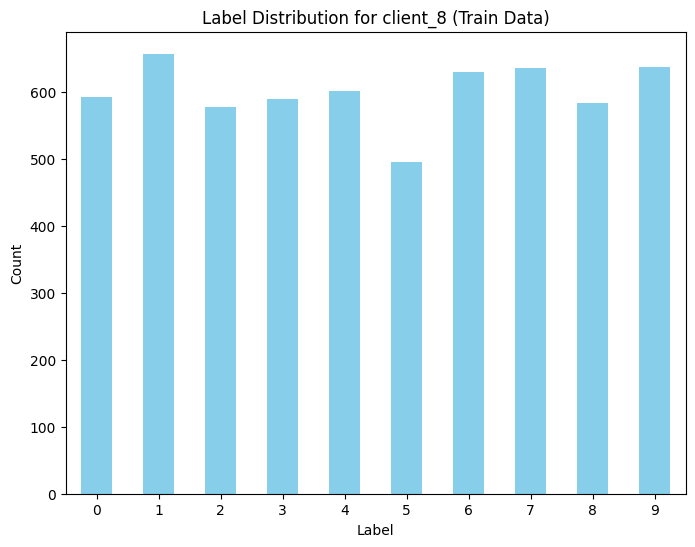

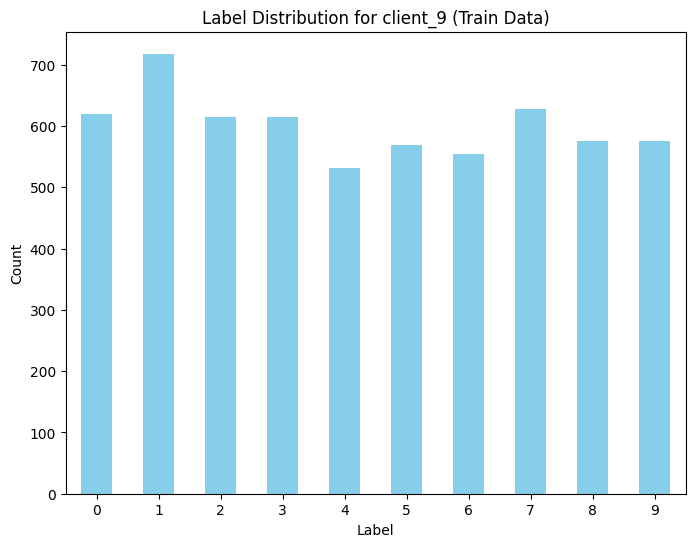

In [4]:
# Now plot the label distribution for each client
for client_folder, train_df in client_train_datasets.items():
    plt.figure(figsize=(8, 6))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [5]:
# to_pil = transforms.ToPILImage()
# pil_image = to_pil(df_train.image[0])

# # Show the image
# pil_image.show()

In [7]:
df = client_train_datasets['client_1']

In [9]:
df.label.value_counts()

1    694
3    623
7    614
0    607
9    600
2    592
6    590
4    581
5    555
8    544
Name: label, dtype: int64

# Case 1: Client Drifted DataSet

In [11]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drifted_dataset"
drift_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients = len(drift_folder)
num_drifted_clients

3

In [12]:
# List to store the client datasets
drift_client_train_datasets = {}
drift_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(train_file)
    
    # Create a Dataset for the client
    drift_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

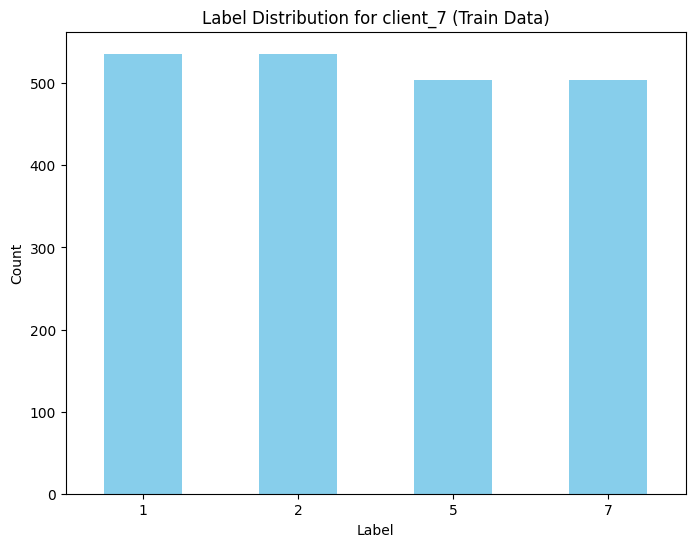

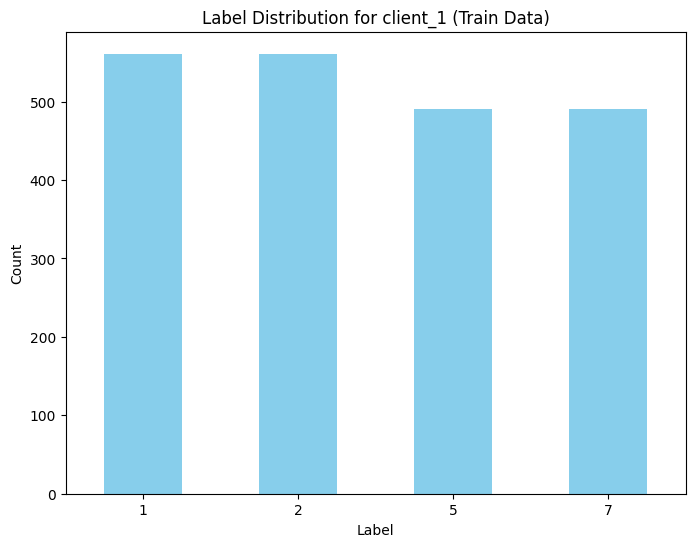

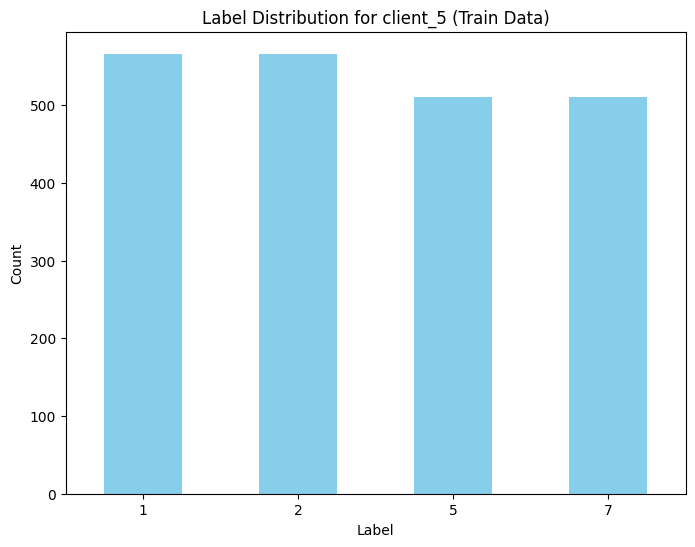

In [13]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_client_train_datasets.items():
    plt.figure(figsize=(8, 6))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [19]:
drift_client_train_datasets['client_1']

,image,label
0,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
1,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
2,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
3,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
4,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
...,...,...
2099,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
2100,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
2101,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1
2102,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1


In [22]:
to_pil = transforms.ToPILImage()
pil_image = to_pil(drift_client_train_datasets['client_1']['image'][4])

# Show the image
pil_image.show()